In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_norm = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col="id")
df_synt = pd.read_csv("synthetic_train.csv", index_col="id")

pd.set_option('display.max_columns', None)

print(f"Normal dataset unique columns: {list(df_norm.columns)}")
print(f"Normal dataset number of rows and columns: {df_norm.shape}")
print("----------------------------------------------------------------------------")
print(f"Synthetic dataset unique columns: {list(df_synt.columns)}")
print(f"Synthetic dataset number of rows and columns: {df_synt.shape}")

Normal dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Normal dataset number of rows and columns: (5110, 11)
----------------------------------------------------------------------------
Synthetic dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Synthetic dataset number of rows and columns: (15304, 11)


# Normal Dataset

In [3]:
df_norm.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_norm.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
had_stroke = df_norm[df_norm.stroke == 1].count()[0]
no_stroke = df_norm[df_norm.stroke == 0].count()[0]

print("#stroke patiens", had_stroke)
print("#healthy people", no_stroke)

#stroke patiens 249
#healthy people 4861


In [6]:
df_norm = df_norm.dropna(axis=0)

In [7]:
#Mutual information

X = df_norm.copy()
y = X.pop("stroke")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

age                  0.046288
heart_disease        0.013700
ever_married         0.013498
Residence_type       0.008312
hypertension         0.006869
work_type            0.004672
avg_glucose_level    0.004309
smoking_status       0.002796
bmi                  0.001477
gender               0.000000
Name: MI Scores, dtype: float64

# Synthetic Dataset

In [8]:
df_synt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [9]:
df_synt.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
had_stroke = df_synt[df_synt.stroke == 1].count()[0]
no_stroke = df_synt[df_synt.stroke == 0].count()[0]

print("#stroke patiens", had_stroke)
print("#healthy people", no_stroke)

#stroke patiens 632
#healthy people 14672


In [11]:
#Mutual information

X = df_synt.copy()
y = X.pop("stroke")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

age                  0.041877
ever_married         0.019536
avg_glucose_level    0.017100
work_type            0.010366
bmi                  0.004769
heart_disease        0.003507
smoking_status       0.003274
hypertension         0.002037
gender               0.001489
Residence_type       0.000000
Name: MI Scores, dtype: float64

# Isolated Correlation Plots

## Gender

In [12]:
norm_gender = df_norm[df_norm.stroke != True].gender
norm_stroke_gender = df_norm[df_norm.stroke == True].gender

unique_gender = norm_gender.unique()

print(f"Healthy people:\ncount: {norm_gender.count()}")
for el in unique_gender:
    print(f"{el} ---> {df_norm[(df_norm.gender == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_gender.count()}")
for el in unique_gender:
    print(f"{el} ---> {df_norm[(df_norm.gender == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
Male ---> 1922
Female ---> 2777
Other ---> 1
----------------------
Had stroke:
count: 209
Male ---> 89
Female ---> 120
Other ---> 0


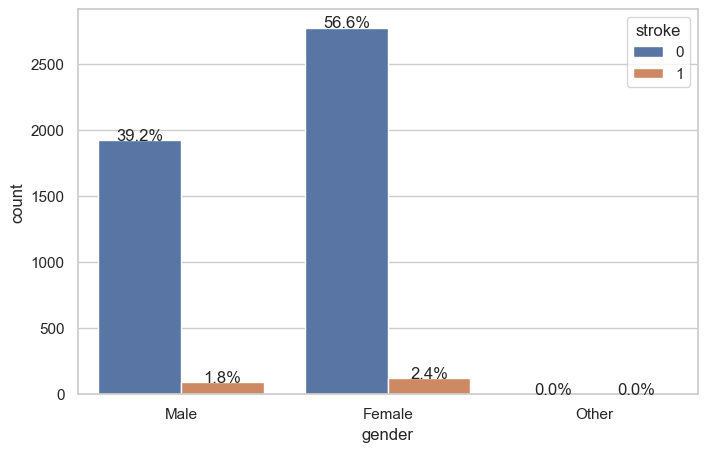

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="gender", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [14]:
synt_gender = df_synt[df_synt.stroke != True].gender
synt_stroke_gender = df_synt[df_synt.stroke == True].gender

unique_gender = synt_gender.unique()

print(f"Healthy people:\ncount: {synt_gender.count()}")
for el in unique_gender:
    print(f"{el} ---> {df_synt[(df_synt.gender == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_gender.count()}")
for el in unique_gender:
    print(f"{el} ---> {df_synt[(df_synt.gender == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
Male ---> 5593
Female ---> 9078
Other ---> 1
----------------------
Had stroke:
count: 632
Male ---> 264
Female ---> 368
Other ---> 0


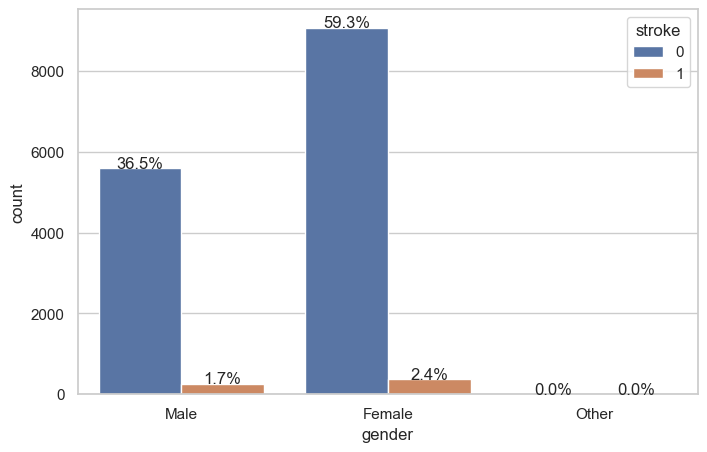

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="gender", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Age

In [16]:
norm_age = df_norm[df_norm.stroke != True].age
norm_stroke_age = df_norm[df_norm.stroke == True].age

print(f"Healthy people:\n{norm_age.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{norm_stroke_age.describe().to_string()}")

Healthy people:
count    4700.000000
mean       41.760451
std        22.268129
min         0.080000
25%        24.000000
50%        43.000000
75%        59.000000
max        82.000000
----------------------
Had stroke:
count    209.000000
mean      67.712919
std       12.402848
min       14.000000
25%       58.000000
50%       70.000000
75%       78.000000
max       82.000000


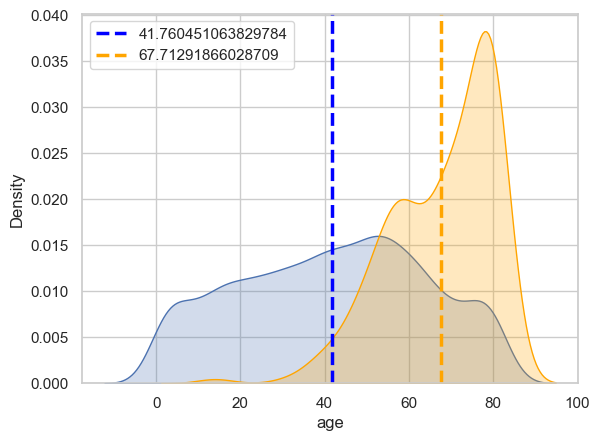

In [17]:
sns.kdeplot(data=norm_age, fill=True)
plt.axvline(x=norm_age.mean(), color='blue', ls='--', lw=2.5, label=norm_age.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=norm_stroke_age, fill=True, color = "orange")
plt.axvline(x=norm_stroke_age.mean(), color='orange', ls='--', lw=2.5, label=norm_stroke_age.mean())
plt.legend(loc="upper left")

In [18]:
synt_age = df_synt[df_synt.stroke != True].age
synt_stroke_age = df_synt[df_synt.stroke == True].age

print(f"Healthy people:\n{synt_age.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{synt_stroke_age.describe().to_string()}")

Healthy people:
count    14672.000000
mean        40.254676
std         20.996022
min          0.080000
25%         25.000000
50%         42.000000
75%         56.000000
max         82.000000
----------------------
Had stroke:
count    632.000000
mean      68.417722
std       11.904115
min       10.000000
25%       59.000000
50%       71.000000
75%       79.000000
max       82.000000


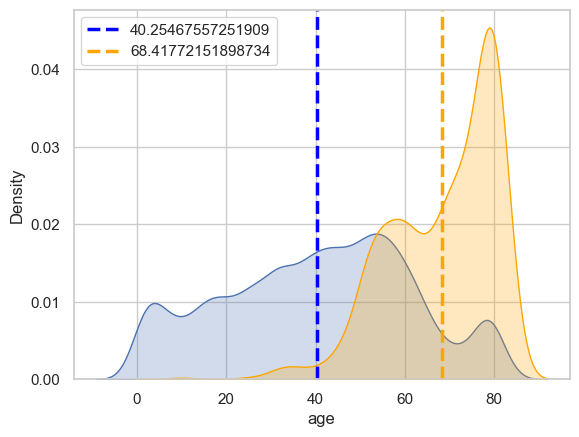

In [19]:
sns.kdeplot(data=synt_age, fill=True)
plt.axvline(x=synt_age.mean(), color='blue', ls='--', lw=2.5, label=synt_age.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=synt_stroke_age, fill=True, color = "orange")
plt.axvline(x=synt_stroke_age.mean(), color='orange', ls='--', lw=2.5, label=synt_stroke_age.mean())
plt.legend(loc="upper left")

## Hypertension

In [20]:
norm_hypertension = df_norm[df_norm.stroke != True].hypertension
norm_stroke_hypertension = df_norm[df_norm.stroke == True].hypertension

unique_hypertension = norm_hypertension.unique()

print(f"Healthy people:\ncount: {norm_hypertension.count()}")
for el in unique_hypertension:
    print(f"{el} ---> {df_norm[(df_norm.hypertension == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_hypertension.count()}")
for el in unique_hypertension:
    print(f"{el} ---> {df_norm[(df_norm.hypertension == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
0 ---> 4309
1 ---> 391
----------------------
Had stroke:
count: 209
0 ---> 149
1 ---> 60


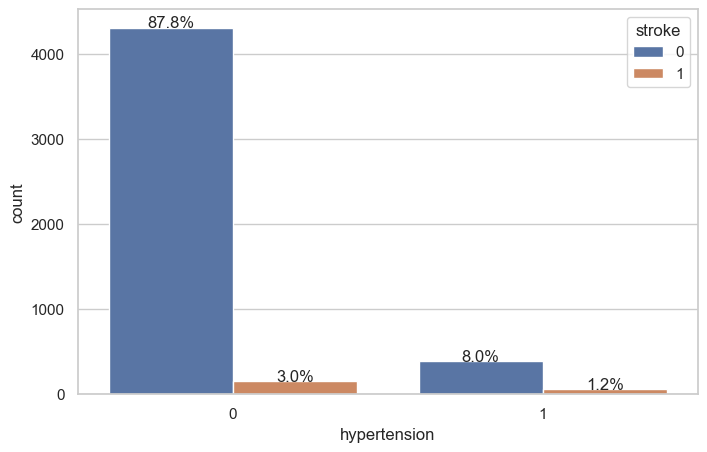

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="hypertension", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [22]:
synt_hypertension = df_synt[df_synt.stroke != True].hypertension
synt_stroke_hypertension = df_synt[df_synt.stroke == True].hypertension

unique_hypertension = synt_hypertension.unique()

print(f"Healthy people:\ncount: {synt_hypertension.count()}")
for el in unique_hypertension:
    print(f"{el} ---> {df_synt[(df_synt.hypertension == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_hypertension.count()}")
for el in unique_hypertension:
    print(f"{el} ---> {df_synt[(df_synt.hypertension == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
0 ---> 14039
1 ---> 633
----------------------
Had stroke:
count: 632
0 ---> 504
1 ---> 128


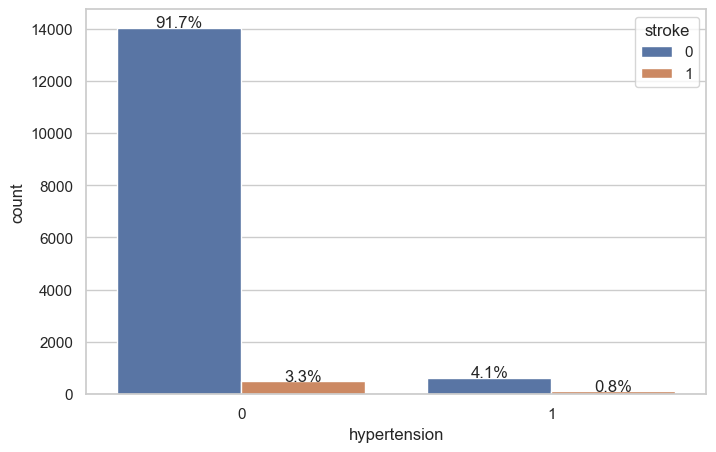

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="hypertension", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Heart Disease

In [24]:
norm_heart_disease = df_norm[df_norm.stroke != True].heart_disease
norm_stroke_heart_disease = df_norm[df_norm.stroke == True].heart_disease

unique_heart_disease = norm_heart_disease.unique()

print(f"Healthy people:\ncount: {norm_heart_disease.count()}")
for el in unique_heart_disease:
    print(f"{el} ---> {df_norm[(df_norm.heart_disease == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_heart_disease.count()}")
for el in unique_heart_disease:
    print(f"{el} ---> {df_norm[(df_norm.heart_disease == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
0 ---> 4497
1 ---> 203
----------------------
Had stroke:
count: 209
0 ---> 169
1 ---> 40


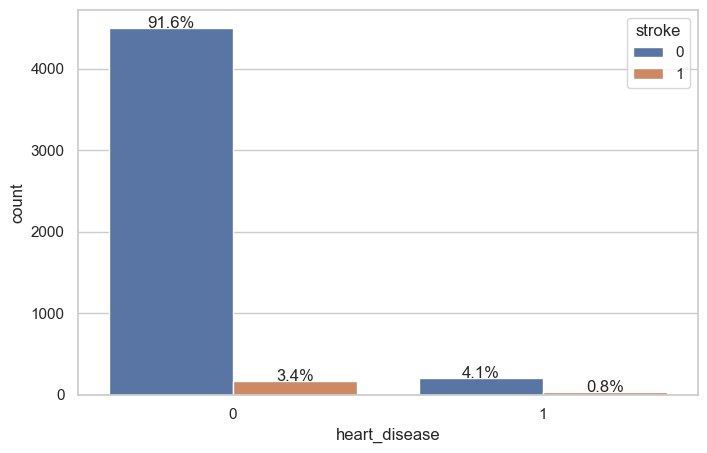

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="heart_disease", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [26]:
synt_heart_disease = df_synt[df_synt.stroke != True].heart_disease
synt_stroke_heart_disease = df_synt[df_synt.stroke == True].heart_disease

unique_heart_disease = synt_heart_disease.unique()

print(f"Healthy people:\ncount: {synt_heart_disease.count()}")
for el in unique_heart_disease:
    print(f"{el} ---> {df_synt[(df_synt.heart_disease == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_heart_disease.count()}")
for el in unique_heart_disease:
    print(f"{el} ---> {df_synt[(df_synt.heart_disease == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
0 ---> 14381
1 ---> 291
----------------------
Had stroke:
count: 632
0 ---> 566
1 ---> 66


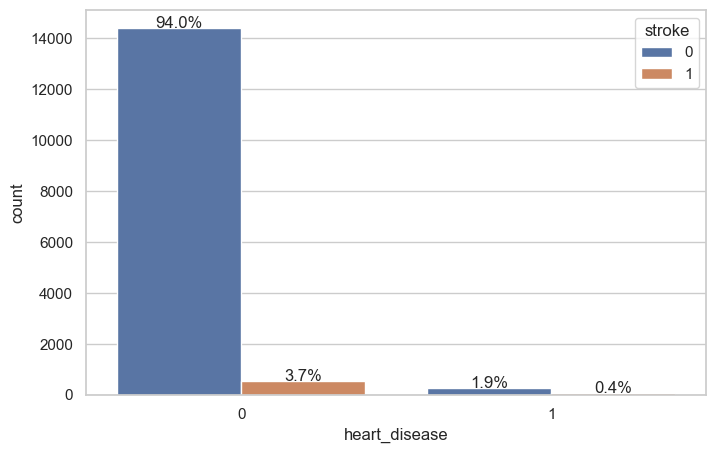

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="heart_disease", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Ever Married

In [28]:
norm_ever_married = df_norm[df_norm.stroke != True].ever_married
norm_stroke_ever_married = df_norm[df_norm.stroke == True].ever_married

unique_ever_married = norm_ever_married.unique()

print(f"Healthy people:\ncount: {norm_ever_married.count()}")
for el in unique_ever_married:
    print(f"{el} ---> {df_norm[(df_norm.ever_married == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_ever_married.count()}")
for el in unique_ever_married:
    print(f"{el} ---> {df_norm[(df_norm.ever_married == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
No ---> 1682
Yes ---> 3018
----------------------
Had stroke:
count: 209
No ---> 23
Yes ---> 186


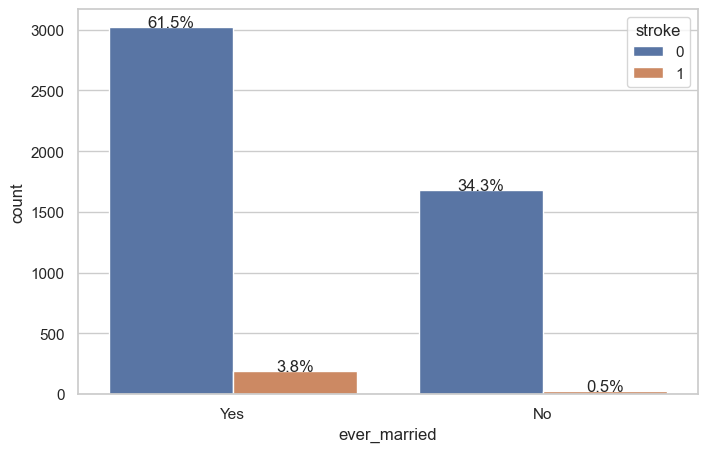

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="ever_married", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [30]:
synt_ever_married = df_synt[df_synt.stroke != True].ever_married
synt_stroke_ever_married = df_synt[df_synt.stroke == True].ever_married

unique_ever_married = synt_ever_married.unique()

print(f"Healthy people:\ncount: {synt_ever_married.count()}")
for el in unique_ever_married:
    print(f"{el} ---> {df_synt[(df_synt.ever_married == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_ever_married.count()}")
for el in unique_ever_married:
    print(f"{el} ---> {df_synt[(df_synt.ever_married == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
Yes ---> 9794
No ---> 4878
----------------------
Had stroke:
count: 632
Yes ---> 591
No ---> 41


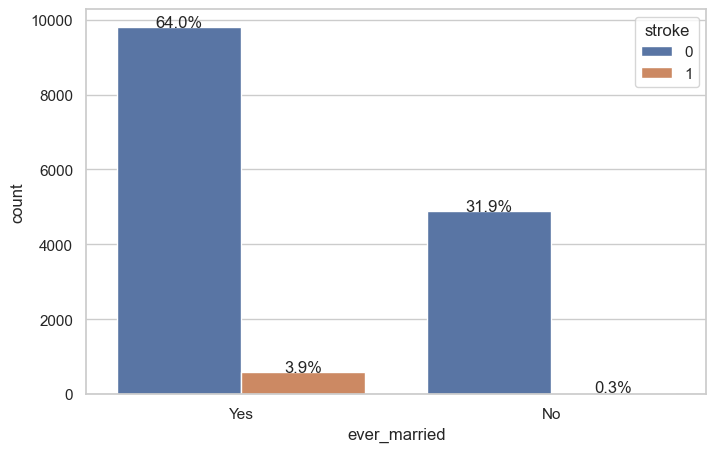

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="ever_married", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Work Type

In [32]:
norm_work_type = df_norm[df_norm.stroke != True].work_type
norm_stroke_work_type = df_norm[df_norm.stroke == True].work_type

unique_work_type = norm_work_type.unique()

print(f"Healthy people:\ncount: {norm_work_type.count()}")
for el in unique_work_type:
    print(f"{el} ---> {df_norm[(df_norm.work_type == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_work_type.count()}")
for el in unique_work_type:
    print(f"{el} ---> {df_norm[(df_norm.work_type == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
children ---> 670
Private ---> 2684
Never_worked ---> 22
Self-employed ---> 722
Govt_job ---> 602
----------------------
Had stroke:
count: 209
children ---> 1
Private ---> 127
Never_worked ---> 0
Self-employed ---> 53
Govt_job ---> 28


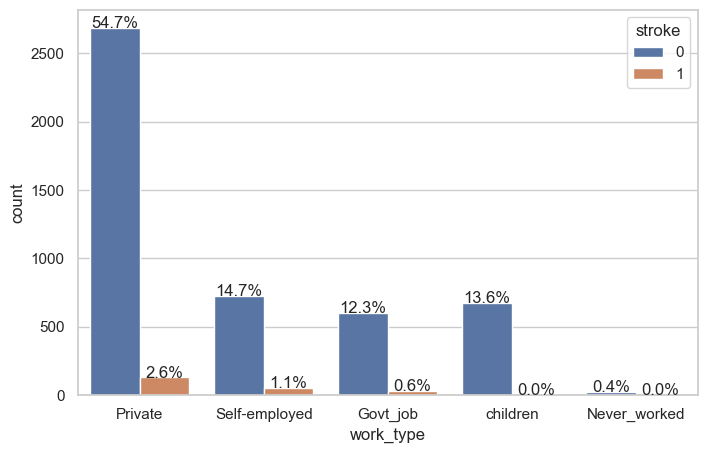

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="work_type", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [34]:
synt_work_type = df_synt[df_synt.stroke != True].work_type
synt_stroke_work_type = df_synt[df_synt.stroke == True].work_type

unique_work_type = synt_work_type.unique()

print(f"Healthy people:\ncount: {synt_work_type.count()}")
for el in unique_work_type:
    print(f"{el} ---> {df_synt[(df_synt.work_type == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_work_type.count()}")
for el in unique_work_type:
    print(f"{el} ---> {df_synt[(df_synt.work_type == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
Private ---> 9348
Self-employed ---> 1781
Govt_job ---> 1464
children ---> 2037
Never_worked ---> 42
----------------------
Had stroke:
count: 632
Private ---> 404
Self-employed ---> 158
Govt_job ---> 69
children ---> 1
Never_worked ---> 0


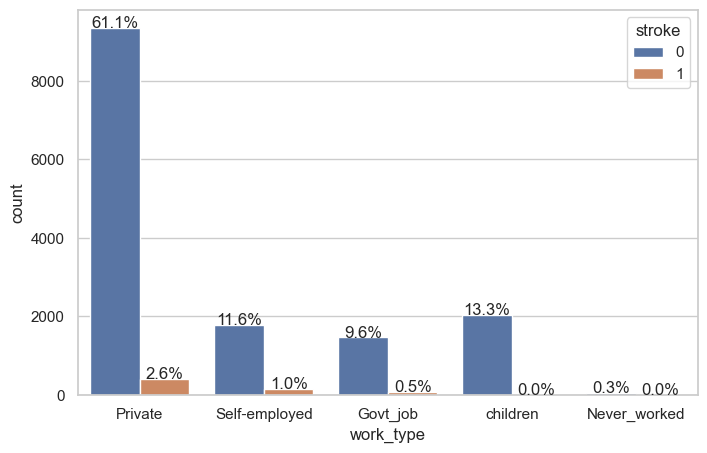

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="work_type", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Residence Type

In [36]:
norm_Residence_type = df_norm[df_norm.stroke != True].Residence_type
norm_stroke_Residence_type = df_norm[df_norm.stroke == True].Residence_type

unique_Residence_type = norm_Residence_type.unique()

print(f"Healthy people:\ncount: {norm_Residence_type.count()}")
for el in unique_Residence_type:
    print(f"{el} ---> {df_norm[(df_norm.Residence_type == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_Residence_type.count()}")
for el in unique_Residence_type:
    print(f"{el} ---> {df_norm[(df_norm.Residence_type == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
Rural ---> 2319
Urban ---> 2381
----------------------
Had stroke:
count: 209
Rural ---> 100
Urban ---> 109


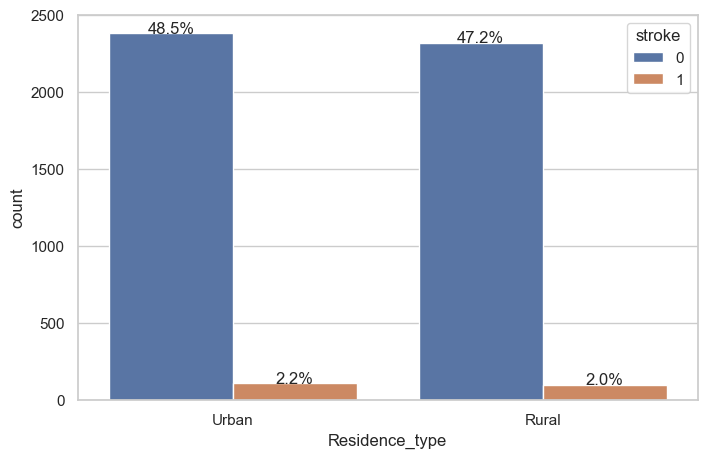

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="Residence_type", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [38]:
synt_Residence_type = df_synt[df_synt.stroke != True].Residence_type
synt_stroke_Residence_type = df_synt[df_synt.stroke == True].Residence_type

unique_Residence_type = synt_Residence_type.unique()

print(f"Healthy people:\ncount: {synt_Residence_type.count()}")
for el in unique_Residence_type:
    print(f"{el} ---> {df_synt[(df_synt.Residence_type == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_Residence_type.count()}")
for el in unique_Residence_type:
    print(f"{el} ---> {df_synt[(df_synt.Residence_type == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
Urban ---> 7325
Rural ---> 7347
----------------------
Had stroke:
count: 632
Urban ---> 315
Rural ---> 317


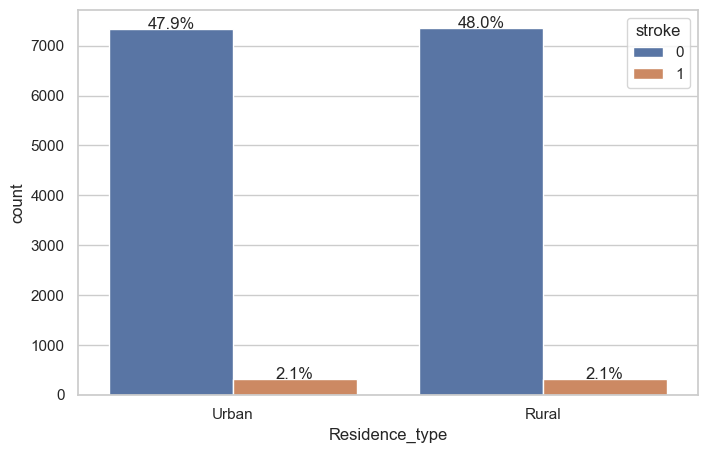

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="Residence_type", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Avarage Glucose Level

In [40]:
norm_avg_glucose_level = df_norm[df_norm.stroke != True].avg_glucose_level
norm_stroke_avg_glucose_level = df_norm[df_norm.stroke == True].avg_glucose_level

print(f"Healthy people:\n{norm_avg_glucose_level.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{norm_stroke_avg_glucose_level.describe().to_string()}")

Healthy people:
count    4700.000000
mean      104.003736
std        42.997798
min        55.120000
25%        76.887500
50%        91.210000
75%       112.432500
max       267.760000
----------------------
Had stroke:
count    209.000000
mean     134.571388
std       62.462047
min       56.110000
25%       80.430000
50%      106.580000
75%      196.920000
max      271.740000


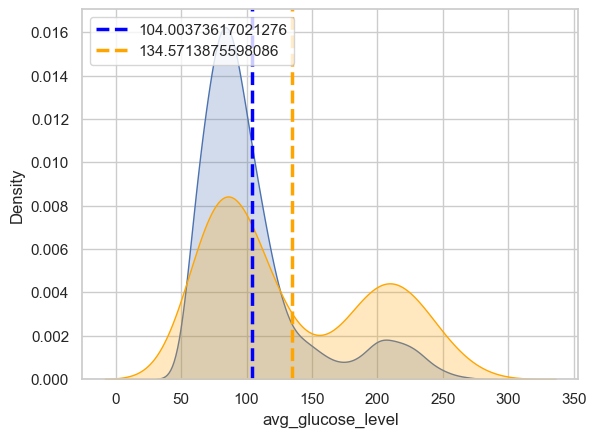

In [41]:
sns.kdeplot(data=norm_avg_glucose_level, fill=True)
plt.axvline(x=norm_avg_glucose_level.mean(), color='blue', ls='--', lw=2.5, label=norm_avg_glucose_level.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=norm_stroke_avg_glucose_level, fill=True, color = "orange")
plt.axvline(x=norm_stroke_avg_glucose_level.mean(), color='orange', ls='--', lw=2.5, label=norm_stroke_avg_glucose_level.mean())
plt.legend(loc="upper left")

In [42]:
synt_avg_glucose_level = df_synt[df_synt.stroke != True].avg_glucose_level
synt_stroke_avg_glucose_level = df_synt[df_synt.stroke == True].avg_glucose_level

print(f"Healthy people:\n{norm_avg_glucose_level.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{norm_stroke_avg_glucose_level.describe().to_string()}")

Healthy people:
count    4700.000000
mean      104.003736
std        42.997798
min        55.120000
25%        76.887500
50%        91.210000
75%       112.432500
max       267.760000
----------------------
Had stroke:
count    209.000000
mean     134.571388
std       62.462047
min       56.110000
25%       80.430000
50%      106.580000
75%      196.920000
max      271.740000


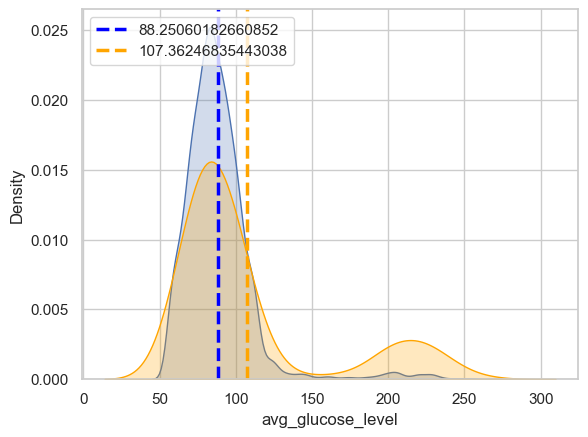

In [43]:
sns.kdeplot(data=synt_avg_glucose_level, fill=True)
plt.axvline(x=synt_avg_glucose_level.mean(), color='blue', ls='--', lw=2.5, label=synt_avg_glucose_level.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=synt_stroke_avg_glucose_level, fill=True, color = "orange")
plt.axvline(x=synt_stroke_avg_glucose_level.mean(), color='orange', ls='--', lw=2.5, label=synt_stroke_avg_glucose_level.mean())
plt.legend(loc="upper left")

## Body Mass Index (BMI)

In [44]:
norm_bmi = df_norm[df_norm.stroke != True].bmi
norm_stroke_bmi = df_norm[df_norm.stroke == True].bmi

print(f"Healthy people:\n{norm_bmi.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{norm_stroke_bmi.describe().to_string()}")

Healthy people:
count    4700.000000
mean       28.823064
std         7.908287
min        10.300000
25%        23.400000
50%        28.000000
75%        33.100000
max        97.600000
----------------------
Had stroke:
count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000


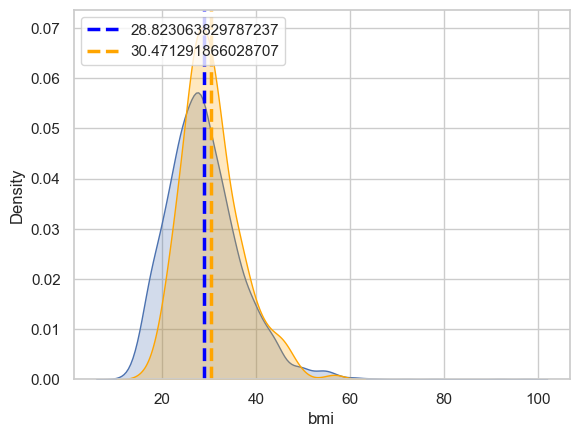

In [45]:
sns.kdeplot(data=norm_bmi, fill=True)
plt.axvline(x=norm_bmi.mean(), color='blue', ls='--', lw=2.5, label=norm_bmi.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=norm_stroke_bmi, fill=True, color = "orange")
plt.axvline(x=norm_stroke_bmi.mean(), color='orange', ls='--', lw=2.5, label=norm_stroke_bmi.mean())
plt.legend(loc="upper left")

In [46]:
synt_bmi = df_synt[df_synt.stroke != True].bmi
synt_stroke_bmi = df_synt[df_synt.stroke == True].bmi

print(f"Healthy people:\n{synt_bmi.describe().to_string()}")
print("----------------------")
print(f"Had stroke:\n{synt_stroke_bmi.describe().to_string()}")

Healthy people:
count    14672.000000
mean        28.021489
std          6.749056
min         10.300000
25%         23.400000
50%         27.500000
75%         31.900000
max         80.100000
----------------------
Had stroke:
count    632.000000
mean      30.230696
std        5.674430
min       15.500000
25%       26.700000
50%       29.400000
75%       33.300000
max       60.900000


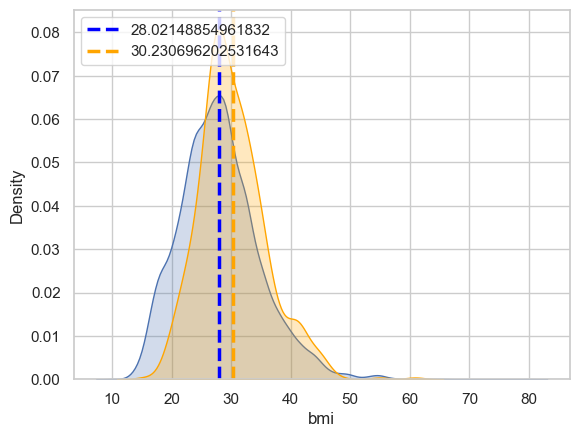

In [47]:
sns.kdeplot(data=synt_bmi, fill=True)
plt.axvline(x=synt_bmi.mean(), color='blue', ls='--', lw=2.5, label=synt_bmi.mean())
plt.legend(loc="upper left")

#Uncomment line below to see seperate charts
#plt.figure()

sns.kdeplot(data=synt_stroke_bmi, fill=True, color = "orange")
plt.axvline(x=synt_stroke_bmi.mean(), color='orange', ls='--', lw=2.5, label=synt_stroke_bmi.mean())
plt.legend(loc="upper left")

## Smoking Status

In [48]:
norm_smoking_status = df_norm[df_norm.stroke != True].smoking_status
norm_stroke_smoking_status = df_norm[df_norm.stroke == True].smoking_status

unique_smoking_status = norm_smoking_status.unique()

print(f"Healthy people:\ncount: {norm_smoking_status.count()}")
for el in unique_smoking_status:
    print(f"{el} ---> {df_norm[(df_norm.smoking_status == el) & (df_norm.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {norm_stroke_smoking_status.count()}")
for el in unique_smoking_status:
    print(f"{el} ---> {df_norm[(df_norm.smoking_status == el) & (df_norm.stroke == True)].count()[0]}")

Healthy people:
count: 4700
Unknown ---> 1454
never smoked ---> 1768
formerly smoked ---> 780
smokes ---> 698
----------------------
Had stroke:
count: 209
Unknown ---> 29
never smoked ---> 84
formerly smoked ---> 57
smokes ---> 39


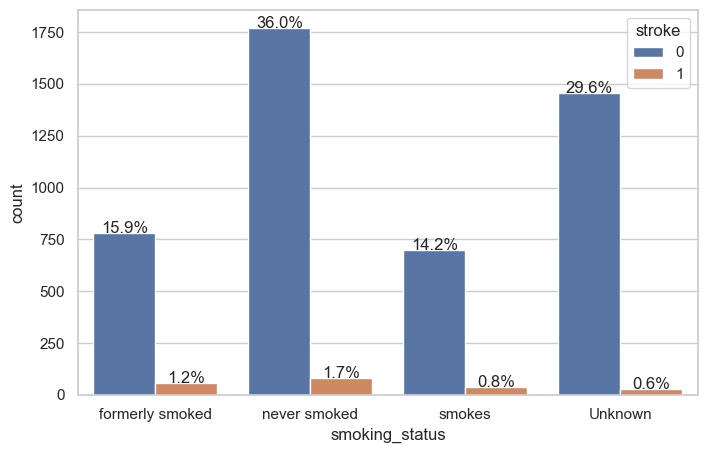

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_norm))
ax = sns.countplot(x="smoking_status", hue="stroke", data=df_norm)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [51]:
synt_smoking_status = df_synt[df_synt.stroke != True].smoking_status
synt_stroke_smoking_status= df_synt[df_synt.stroke == True].smoking_status

unique_smoking_status = synt_smoking_status.unique()

print(f"Healthy people:\ncount: {synt_smoking_status.count()}")
for el in unique_smoking_status:
    print(f"{el} ---> {df_synt[(df_synt.smoking_status == el) & (df_synt.stroke != True)].count()[0]}")

        
print("----------------------")
print(f"Had stroke:\ncount: {synt_stroke_smoking_status.count()}")
for el in unique_smoking_status:
    print(f"{el} ---> {df_synt[(df_synt.smoking_status == el) & (df_synt.stroke == True)].count()[0]}")

Healthy people:
count: 14672
never smoked ---> 6024
formerly smoked ---> 2178
Unknown ---> 4435
smokes ---> 2035
----------------------
Had stroke:
count: 632
never smoked ---> 257
formerly smoked ---> 159
Unknown ---> 108
smokes ---> 108


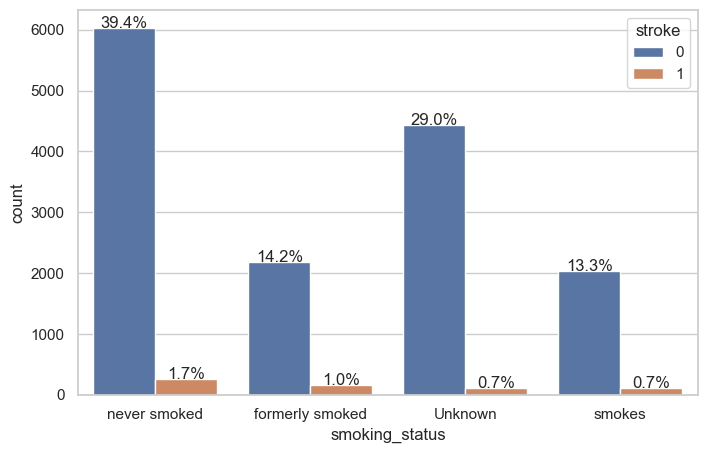

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_synt))
ax = sns.countplot(x="smoking_status", hue="stroke", data=df_synt)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()